In [16]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%load_ext autoreload
%autoreload 2
%matplotlib inline
import features
import utils
import test
import train

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Visualize Feature Extraction

In [5]:
path = "../INRIAPerson/train_64x128_H96/pos/crop001001a.png"

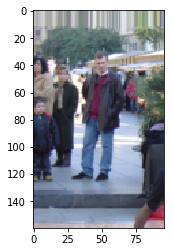

In [8]:
# Image without cropping
img = utils.load_image(path, crop = False)
plt.imshow(img)

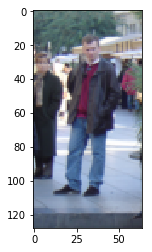

In [10]:
# Cropped image to 64 x 128 pixels
# We will use this cropped image to train the model
cimg = utils.load_image(path, crop = True)
plt.imshow(cimg)

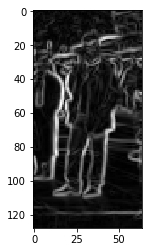

In [11]:
# Compute graident with the sobel operator
mag, theta = features.gradient(cimg)
plt.imshow(mag, cmap = "gray")

In [19]:
# Extract feature descriptors for the detector window 
# 1. bin the gradient
# 2. each cell vote for the orientations -> (9,) vector associated with each cell
# 3. contrast normalization for each block
fd = features.HOG(cimg)

In [20]:
# Check feature dimension
fd.shape

(3780,)

In [84]:
# Visualize HOG

## Pedestrian detection for a single image

In [25]:
filename = "../INRIAPerson/Test/pos/crop001533.png"

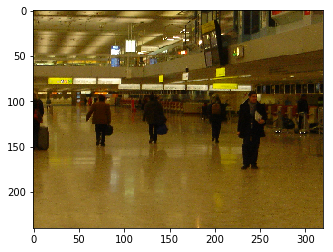

In [26]:
# Load and resize image to 320 x 240
img = Image.open(filename).resize((320, 240))
img = np.array(img) / 255
plt.imshow(img)

In [28]:
import test
detect = test.recognize(filename, stride = 16, wsize = (128, 64), width = 2)

/Users/liucan/anaconda/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


image size: (240, 320, 3)
extract features...
predict...
detect...
AHA: 64, 208


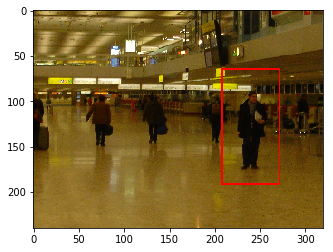

In [29]:
plt.imshow(detect)